In [269]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [270]:
import pandas as pd
import pandas_datareader as pdr

In [271]:
df=pd.read_csv('/content/drive/MyDrive/corona project/bangladesh.csv')

In [272]:
df.head()

,date,new_case,death
0,9-27-2020,1275,32
1,9-28-2020,1407,32
2,9-29-2020,1488,26
3,9-30-2020,1436,32
4,10-1-2020,1508,21


In [273]:
df.tail()

,date,new_case,death
414,11/15/2021,234,4
415,11/16/2021,213,2
416,11/17/2021,266,6
417,11/18/2021,244,5
418,11/19/2021,253,7


In [274]:
df1=df.reset_index()['new_case']

In [275]:
df1

0      1275
1      1407
2      1488
3      1436
4      1508
       ... 
414     234
415     213
416     266
417     244
418     253
Name: new_case, Length: 419, dtype: int64

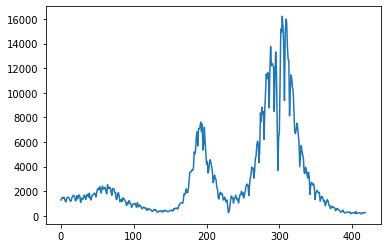

In [276]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [277]:
import numpy as np

In [278]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [279]:
print(df1)

[[6.99048448e-02]
 [7.81143106e-02]
 [8.31519373e-02]
 [7.99179053e-02]
 [8.43957958e-02]
 [7.74301884e-02]
 [6.41209030e-02]
 [6.05759065e-02]
 [8.02910629e-02]
 [8.38360595e-02]
 [8.51421108e-02]
 [8.02288700e-02]
 [7.00914236e-02]
 [6.54269544e-02]
 [6.48050252e-02]
 [8.21568506e-02]
 [8.61993905e-02]
 [9.53417501e-02]
 [9.01175446e-02]
 [8.55774613e-02]
 [6.58001119e-02]
 [6.98426519e-02]
 [9.24186828e-02]
 [7.64351017e-02]
 [8.66969339e-02]
 [9.60880652e-02]
 [8.92468437e-02]
 [5.86479259e-02]
 [7.19572113e-02]
 [7.99179053e-02]
 [7.36364202e-02]
 [8.34629019e-02]
 [9.51551713e-02]
 [9.03663163e-02]
 [7.27035263e-02]
 [8.81273711e-02]
 [9.85757821e-02]
 [9.37869270e-02]
 [8.49555321e-02]
 [1.05168232e-01]
 [8.19702718e-02]
 [7.07755457e-02]
 [8.22812364e-02]
 [9.52795572e-02]
 [9.62746439e-02]
 [9.83892033e-02]
 [1.05354811e-01]
 [1.00503763e-01]
 [8.58262330e-02]
 [1.04857267e-01]
 [1.23639530e-01]
 [1.28179613e-01]
 [1.21898128e-01]
 [1.37632937e-01]
 [1.32097767e-01]
 [1.054791

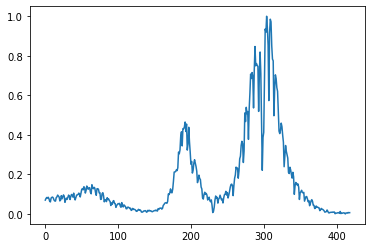

In [280]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [281]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [282]:
training_size,test_size

(272, 147)

In [283]:
train_data

array([[0.06990484],
       [0.07811431],
       [0.08315194],
       [0.07991791],
       [0.0843958 ],
       [0.07743019],
       [0.0641209 ],
       [0.06057591],
       [0.08029106],
       [0.08383606],
       [0.08514211],
       [0.08022887],
       [0.07009142],
       [0.06542695],
       [0.06480503],
       [0.08215685],
       [0.08619939],
       [0.09534175],
       [0.09011754],
       [0.08557746],
       [0.06580011],
       [0.06984265],
       [0.09241868],
       [0.0764351 ],
       [0.08669693],
       [0.09608807],
       [0.08924684],
       [0.05864793],
       [0.07195721],
       [0.07991791],
       [0.07363642],
       [0.0834629 ],
       [0.09515517],
       [0.09036632],
       [0.07270353],
       [0.08812737],
       [0.09857578],
       [0.09378693],
       [0.08495553],
       [0.10516823],
       [0.08197027],
       [0.07077555],
       [0.08228124],
       [0.09527956],
       [0.09627464],
       [0.0983892 ],
       [0.10535481],
       [0.100

In [284]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [285]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [286]:
print(X_train.shape), print(y_train.shape)

(261, 10)
(261,)


(None, None)

In [287]:
print(X_test.shape), print(ytest.shape)

(136, 10)
(136,)


(None, None)

In [288]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [289]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [290]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [291]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 10, 50)            10400     
                                                                 
 lstm_20 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_21 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_22 (LSTM)              (None, 50)                20200     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [292]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
9/9 [==============================] - 9s 194ms/step - loss: 0.0128 - val_loss: 0.0616
Epoch 2/100
9/9 [==============================] - 0s 27ms/step - loss: 0.0065 - val_loss: 0.0578
Epoch 3/100
9/9 [==============================] - 0s 28ms/step - loss: 0.0045 - val_loss: 0.0207
Epoch 4/100
9/9 [==============================] - 0s 28ms/step - loss: 0.0037 - val_loss: 0.0231
Epoch 5/100
9/9 [==============================] - 0s 28ms/step - loss: 0.0032 - val_loss: 0.0233
Epoch 6/100
9/9 [==============================] - 0s 28ms/step - loss: 0.0031 - val_loss: 0.0205
Epoch 7/100
9/9 [==============================] - 0s 29ms/step - loss: 0.0029 - val_loss: 0.0196
Epoch 8/100
9/9 [==============================] - 0s 27ms/step - loss: 0.0029 - val_loss: 0.0195
Epoch 9/100
9/9 [==============================] - 0s 30ms/step - loss: 0.0030 - val_loss: 0.0191
Epoch 10/100
9/9 [==============================] - 0s 28ms/step - loss: 0.0029 - val_loss: 0.0233
Epoch 11/100
9/9 [

# **Prediction**

In [293]:
import tensorflow as tf

In [294]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

5/5 [==============================] - 0s 8ms/step


In [295]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# **Performence Matrix**

# **MSE**

In [296]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,train_predict)

6021119.60145181

In [297]:
mean_squared_error(ytest,test_predict)

21127476.497717097

# **RMSE**

In [298]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

2453.796976412639

In [299]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

4596.463477252604

# **MAE**

In [300]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,train_predict)

1981.4828833627437

In [301]:
### Test Data MAE
mean_absolute_error(ytest,test_predict)

3399.286101721105

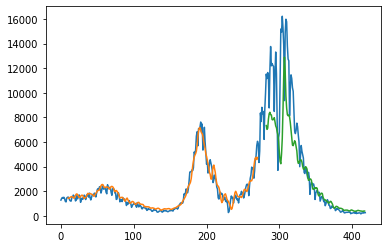

In [302]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [303]:
len(test_data)

147

In [304]:
x_input=test_data[137:].reshape(1,-1)
x_input.shape


(1, 10)

In [305]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [306]:
len(temp_input)

10

In [307]:
temp_input

[0.0052242054854157605,
 0.005348591330306612,
 0.004353504571179801,
 0.0,
 0.004477890416070652,
 0.005162012562970334,
 0.0038559611916163944,
 0.007152186081223958,
 0.005783941787424592,
 0.006343678089433423]

In [308]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.01566909]
11
1 day input [0.00534859 0.0043535  0.         0.00447789 0.00516201 0.00385596
 0.00715219 0.00578394 0.00634368 0.01566909]
1 day output [[0.01748314]]
2 day input [0.0043535  0.         0.00447789 0.00516201 0.00385596 0.00715219
 0.00578394 0.00634368 0.01566909 0.01748314]
2 day output [[0.02042605]]
3 day input [0.         0.00447789 0.00516201 0.00385596 0.00715219 0.00578394
 0.00634368 0.01566909 0.01748314 0.02042605]
3 day output [[0.02414638]]
4 day input [0.00447789 0.00516201 0.00385596 0.00715219 0.00578394 0.00634368
 0.01566909 0.01748314 0.02042605 0.02414638]
4 day output [[0.02746518]]
5 day input [0.00516201 0.00385596 0.00715219 0.00578394 0.00634368 0.01566909
 0.01748314 0.02042605 0.02414638 0.02746518]
5 day output [[0.03225585]]
6 day input [0.00385596 0.00715219 0.00578394 0.00634368 0.01566909 0.01748314
 0.02042605 0.02414638 0.02746518 0.03225585]
6 day output [[0.03738906]]
7 day input [0.00715219 0.00578394 0.00634368 0.01566909 0.0174831

In [309]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [310]:
import matplotlib.pyplot as plt

In [311]:
len(df1)

419

In [312]:
len(lst_output)

30

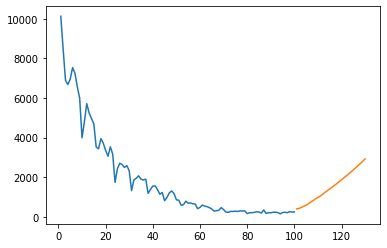

In [313]:
plt.plot(day_new,scaler.inverse_transform(df1[319:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

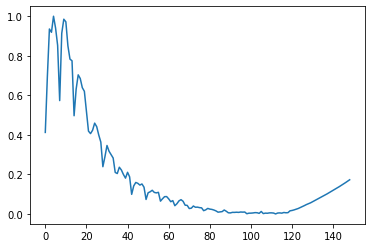

In [314]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[300:])

In [315]:
df3=scaler.inverse_transform(df3).tolist()

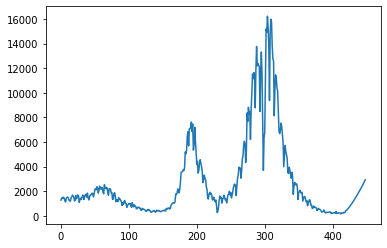

In [316]:
plt.plot(df3)

# **Bidirectional LSTM**

In [317]:
from keras.layers import Bidirectional
model2 = Sequential()
model2.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(10,1)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [318]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 100)              20800     
 nal)                                                            
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


In [319]:
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
9/9 [==============================] - 3s 56ms/step - loss: 0.0163 - val_loss: 0.1000
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0062 - val_loss: 0.0489
Epoch 3/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0052 - val_loss: 0.0371
Epoch 4/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0038 - val_loss: 0.0307
Epoch 5/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0030 - val_loss: 0.0229
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0024 - val_loss: 0.0163
Epoch 7/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0020 - val_loss: 0.0154
Epoch 8/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0019 - val_loss: 0.0156
Epoch 9/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0018 - val_loss: 0.0148
Epoch 10/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0017 - val_loss: 0.0150
Epoch 11/100
9/9 [=

# **Prediction**

In [320]:
train_predict=model2.predict(X_train)
test_predict=model2.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [321]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# **Performence Matrix**

# **MSE**

In [322]:
### Calculate MSE performance metrics
mean_squared_error(y_train,train_predict)

5572336.7470224025

In [323]:
### Test Data MSE
mean_squared_error(ytest,test_predict)

18115590.61757055

# **RMSE**

In [324]:
math.sqrt(mean_squared_error(y_train,train_predict))


2360.579748075121

In [325]:
math.sqrt(mean_squared_error(ytest,test_predict))

4256.241372099396

# **MAE**

In [326]:
mean_absolute_error(y_train,train_predict)


1864.2236764081968

In [327]:
mean_absolute_error(ytest,test_predict)

3050.374545252814

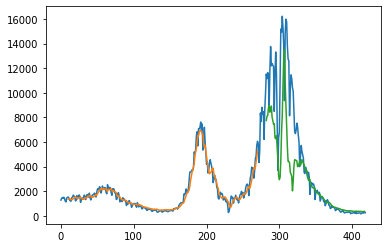

In [328]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [329]:
x_input=test_data[137:].reshape(1,-1)
x_input.shape

(1, 10)

In [330]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [331]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model2.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model2.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.01311683]
11
1 day input [0.00534859 0.0043535  0.         0.00447789 0.00516201 0.00385596
 0.00715219 0.00578394 0.00634368 0.01311683]
1 day output [[0.01477866]]
2 day input [0.0043535  0.         0.00447789 0.00516201 0.00385596 0.00715219
 0.00578394 0.00634368 0.01311683 0.01477866]
2 day output [[0.01652584]]
3 day input [0.         0.00447789 0.00516201 0.00385596 0.00715219 0.00578394
 0.00634368 0.01311683 0.01477866 0.01652584]
3 day output [[0.01832877]]
4 day input [0.00447789 0.00516201 0.00385596 0.00715219 0.00578394 0.00634368
 0.01311683 0.01477866 0.01652584 0.01832877]
4 day output [[0.02006373]]
5 day input [0.00516201 0.00385596 0.00715219 0.00578394 0.00634368 0.01311683
 0.01477866 0.01652584 0.01832877 0.02006373]
5 day output [[0.0218316]]
6 day input [0.00385596 0.00715219 0.00578394 0.00634368 0.01311683 0.01477866
 0.01652584 0.01832877 0.02006373 0.0218316 ]
6 day output [[0.02358985]]
7 day input [0.00715219 0.00578394 0.00634368 0.01311683 0.01477866

In [332]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

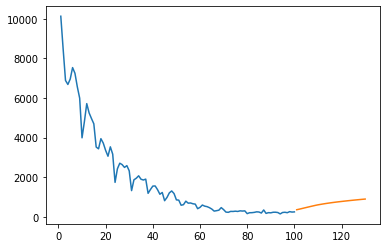

In [333]:
plt.plot(day_new,scaler.inverse_transform(df1[319:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

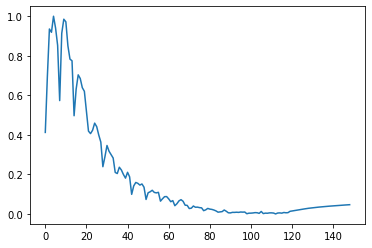

In [334]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[300:])

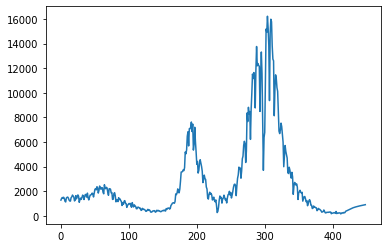

In [335]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

# **Vanilla LSTM**

In [336]:
model3 = Sequential()
model3.add(LSTM(50, activation='relu', input_shape=(10, 1)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error',optimizer='adam')

In [337]:
model3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 50)                10400     
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [338]:
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
9/9 [==============================] - 2s 35ms/step - loss: 0.0218 - val_loss: 0.1623
Epoch 2/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0132 - val_loss: 0.1195
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0076 - val_loss: 0.0843
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0053 - val_loss: 0.0581
Epoch 5/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0039 - val_loss: 0.0410
Epoch 6/100
9/9 [==============================] - 0s 15ms/step - loss: 0.0029 - val_loss: 0.0272
Epoch 7/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0021 - val_loss: 0.0176
Epoch 8/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0016 - val_loss: 0.0145
Epoch 9/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0016 - val_loss: 0.0140
Epoch 10/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0015 - val_loss: 0.0144
Epoch 11/100
9/9 [===

In [339]:
train_predict=model3.predict(X_train)
test_predict=model3.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

5/5 [==============================] - 0s 4ms/step


# **MSE**

In [340]:
### Calculate RMSE performance metrics
mean_squared_error(y_train,train_predict)

6219190.50037113

In [341]:
### Test Data RMSE
mean_squared_error(ytest,test_predict)

25956063.783885274

# **RMSE**

In [342]:
math.sqrt(mean_squared_error(y_train,train_predict))
math.sqrt(mean_squared_error(ytest,test_predict))

5094.70939150461

# **MAE**

In [343]:
mean_absolute_error(y_train,train_predict)
mean_absolute_error(ytest,test_predict)

3575.9020983623755

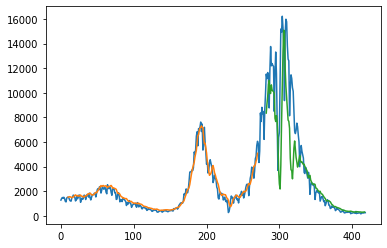

In [344]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [345]:
x_input=test_data[137:].reshape(1,-1)
x_input.shape

(1, 10)

In [346]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [347]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model3.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model3.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.01074924]
11
1 day input [0.00534859 0.0043535  0.         0.00447789 0.00516201 0.00385596
 0.00715219 0.00578394 0.00634368 0.01074924]
1 day output [[0.01234216]]
2 day input [0.0043535  0.         0.00447789 0.00516201 0.00385596 0.00715219
 0.00578394 0.00634368 0.01074924 0.01234216]
2 day output [[0.01415154]]
3 day input [0.         0.00447789 0.00516201 0.00385596 0.00715219 0.00578394
 0.00634368 0.01074924 0.01234216 0.01415154]
3 day output [[0.0161225]]
4 day input [0.00447789 0.00516201 0.00385596 0.00715219 0.00578394 0.00634368
 0.01074924 0.01234216 0.01415154 0.0161225 ]
4 day output [[0.01794531]]
5 day input [0.00516201 0.00385596 0.00715219 0.00578394 0.00634368 0.01074924
 0.01234216 0.01415154 0.0161225  0.01794531]
5 day output [[0.02007945]]
6 day input [0.00385596 0.00715219 0.00578394 0.00634368 0.01074924 0.01234216
 0.01415154 0.0161225  0.01794531 0.02007945]
6 day output [[0.02234542]]
7 day input [0.00715219 0.00578394 0.00634368 0.01074924 0.01234216

In [348]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)   

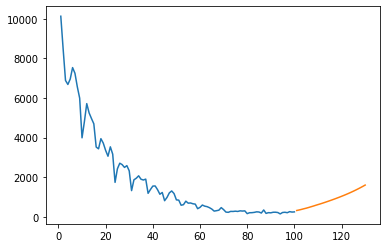

In [349]:
plt.plot(day_new,scaler.inverse_transform(df1[319:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

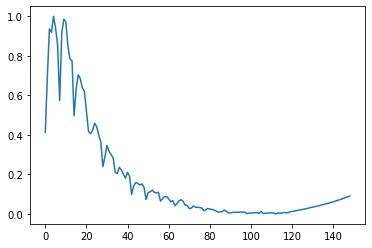

In [350]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[300:])

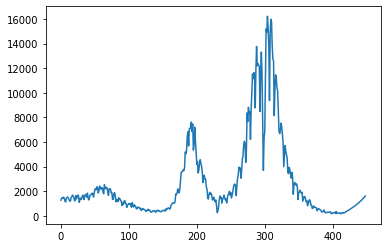

In [351]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

# **ConvLSTM1D**

In [352]:
X_train = X_train.reshape((261, 1, 10, 1))
X_test = X_test.reshape((136, 1, 10, 1))

In [353]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
model4 = Sequential()
model4.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None,10,1)))
model4.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model4.add(TimeDistributed(Flatten()))
model4.add(LSTM(50, activation='relu'))
model4.add(Dense(1))
model4.compile(loss='mean_squared_error',optimizer='adam')

In [354]:
model4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_9 (TimeDis  (None, None, 10, 64)     128       
 tributed)                                                       
                                                                 
 time_distributed_10 (TimeDi  (None, None, 5, 64)      0         
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, None, 320)        0         
 stributed)                                                      
                                                                 
 lstm_25 (LSTM)              (None, 50)                74200     
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                     

In [355]:
model4.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
9/9 [==============================] - 3s 38ms/step - loss: 0.0157 - val_loss: 0.0857
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0066 - val_loss: 0.0319
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0042 - val_loss: 0.0183
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0034 - val_loss: 0.0182
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0029 - val_loss: 0.0159
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0024 - val_loss: 0.0167
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0022 - val_loss: 0.0196
Epoch 8/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0020 - val_loss: 0.0203
Epoch 9/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0019 - val_loss: 0.0256
Epoch 10/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.0208
Epoch 11/100
9/9 [==========

**Prediction**


In [356]:
train_predict=model4.predict(X_train)
test_predict=model4.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

5/5 [==============================] - 0s 2ms/step


**MSE**

In [357]:
### Calculate MSE performance metrics
mean_squared_error(y_train,train_predict)

5880476.425744597

In [358]:
### Test Data MSE
mean_squared_error(ytest,test_predict)

25600564.203174986

**RMSE**

In [359]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

2424.9693659394125

In [360]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

5059.7000111839625

**MAE**

In [361]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train,train_predict)

1886.5221097924161

In [362]:
### Test Data MAE
mean_absolute_error(ytest,test_predict)

3564.51665529202

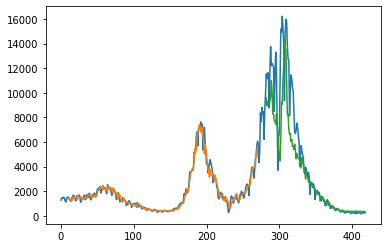

In [363]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [364]:
x_input=test_data[137:].reshape(1,-1)
x_input.shape

(1, 10)

In [365]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [366]:
temp_input

[0.0052242054854157605,
 0.005348591330306612,
 0.004353504571179801,
 0.0,
 0.004477890416070652,
 0.005162012562970334,
 0.0038559611916163944,
 0.007152186081223958,
 0.005783941787424592,
 0.006343678089433423]

In [367]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,1, n_steps, 1))
        #print(x_input)
        yhat = model4.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,1, n_steps,1))
        yhat = model4.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.01244844]
11
1 day input [0.00534859 0.0043535  0.         0.00447789 0.00516201 0.00385596
 0.00715219 0.00578394 0.00634368 0.01244844]
1 day output [[0.01379316]]
2 day input [0.0043535  0.         0.00447789 0.00516201 0.00385596 0.00715219
 0.00578394 0.00634368 0.01244844 0.01379316]
2 day output [[0.01431146]]
3 day input [0.         0.00447789 0.00516201 0.00385596 0.00715219 0.00578394
 0.00634368 0.01244844 0.01379316 0.01431146]
3 day output [[0.01494125]]
4 day input [0.00447789 0.00516201 0.00385596 0.00715219 0.00578394 0.00634368
 0.01244844 0.01379316 0.01431146 0.01494125]
4 day output [[0.01523225]]
5 day input [0.00516201 0.00385596 0.00715219 0.00578394 0.00634368 0.01244844
 0.01379316 0.01431146 0.01494125 0.01523225]
5 day output [[0.01577108]]
6 day input [0.00385596 0.00715219 0.00578394 0.00634368 0.01244844 0.01379316
 0.01431146 0.01494125 0.01523225 0.01577108]
6 day output [[0.01581622]]
7 day input [0.00715219 0.00578394 0.00634368 0.01244844 0.0137931

In [368]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131) 

Text(0, 0.5, 'Confirmed Cases')

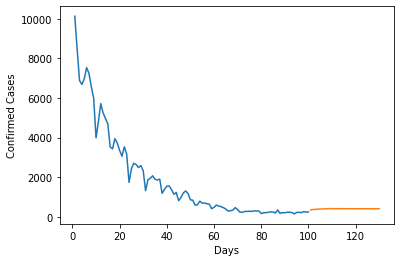

In [369]:
plt.plot(day_new,scaler.inverse_transform(df1[319:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')

Text(0, 0.5, 'Confirmed Cases')

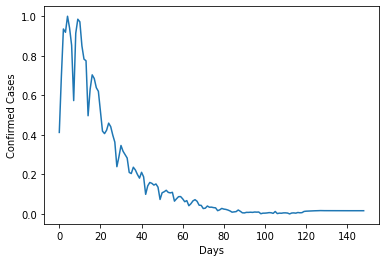

In [370]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[300:])
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')

Text(0, 0.5, 'Confirmed Cases')

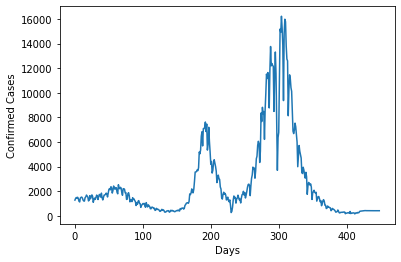

In [371]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')